### Use logistic regression model for comparison with NN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from sklearn.utils import shuffle

sys.path.append('../2_multiclass_classification')
from process import get_data

%matplotlib inline

In [2]:
def y2indicator(y, K):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [3]:
X, Y = get_data('../courseCode/ann_logistic_extra/ecommerce_data.csv')
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32)

In [15]:
D = X.shape[1]
K = len(set(Y))

X_train = X[:-100]
Y_train = Y[:-100]
Y_train_ind = y2indicator(Y_train, K)

X_test = X[-100:]
Y_test = Y[-100:]
Y_test_ind = y2indicator(Y_test, K)

In [16]:
W = np.random.randn(D, K)
b = np.zeros(K)

In [17]:
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis = 1, keepdims = True)

In [18]:
def forward(X, W, b):
    return softmax(X.dot(W) + b)

In [19]:
def predict(prob_Y):
    return np.argmax(prob_Y, axis = 1)

In [20]:
def accuracy(Y, preds):
    return np.mean(Y == preds)

In [21]:
def cross_entropy(T, preds):
    return -np.mean(T * np.log(preds))

In [22]:
# Init
train_costs = []
test_costs = []
eta = 0.001

print('Epoch\tCross-Entropy')
print('     \t(train)\t(test)')

for i in range(10000):
    pred_train = forward(X_train, W, b)
    pred_test  = forward(X_test, W, b)
    
    c_train = cross_entropy(Y_train_ind, pred_train)
    c_test  = cross_entropy(Y_test_ind,  pred_test)
    train_costs.append(c_train)
    test_costs.append(c_test)
    
    # GD
    W -= eta * X_train.T.dot(pred_train - Y_train_ind)
    b -= eta * (pred_train - Y_train_ind).sum(axis = 0)
    
    if i % 1000 == 0:
        print('%5d\t%.5f\t%.5f' %(i, c_train, c_test))
        
print('Final training accuracy:', accuracy(Y_train, predict(pred_train)))
print('Final test accuracy:    ', accuracy(Y_test,  predict(pred_test)))

Epoch	Cross-Entropy
     	(train)	(test)
    0	0.45118	0.46062
 1000	0.09245	0.16374
 2000	0.08957	0.16591
 3000	0.08875	0.16783
 4000	0.08843	0.16913
 5000	0.08830	0.16999
 6000	0.08823	0.17056
 7000	0.08820	0.17095
 8000	0.08819	0.17122
 9000	0.08818	0.17140
Final training accuracy: 0.87
Final test accuracy:     0.83


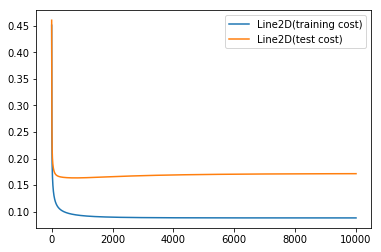

In [23]:
legend1, = plt.plot(train_costs, label = 'training cost')
legend2, = plt.plot(test_costs,  label = 'test cost')
plt.legend([legend1, legend2]);
plt.show();